In [7]:
import Gadget as G
import matplotlib as mpl 
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.mlab import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy           as np
import math            as mt
import statistics      as st
import snap_blocks     as sb
import plots           as im
import plot_format     as pf
import global_fuctions as gf

In [8]:
def subgroup_all(_sgvar):
    sgx_     =_sgvar[0][0]
    sgy_     =_sgvar[1][0]
    sgz_     =_sgvar[2][0]
    sgr_     =_sgvar[3][0]
    sgrho_   =_sgvar[4][0]
    sgvx_    =_sgvar[5][0]
    sgvy_    =_sgvar[6][0]
    sgvz_    =_sgvar[7][0]
    sgbx_    =_sgvar[8][0]
    sgby_    =_sgvar[9][0]
    sgbz_    =_sgvar[10][0]
    sgvrms_  =_sgvar[11][0]
    sgeint_  =_sgvar[12][0] 
    return    sgx_,sgy_,sgz_,sgr_,sgrho_,sgvx_,sgvy_,sgvz_,sgbx_,sgby_,sgbz_,sgvrms_,sgeint_  

In [9]:
#plot parameters
plt.rc('text', usetex=True)
font = {'family': 'sans-serif', 'size': 33, 'serif': ['computer modern roman']}
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = ['Tahoma']
plt.rc('font', **font)
#plt.rc('axes', titlesize=25)     # fontsize of the axes title
#plt.rc('axes', labelsize=33)
plt.rc('legend', **{'fontsize': 24}) 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3
plt.rc('lines', linewidth=3)

In [10]:
#declaration of paths
path_main = '/home/meugenia/Documentos/discos/'
path_snap = path_main+'snaps/'
path_save = path_main +'plots/'

In [11]:
snap = 'snapshot_000'
ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)
r=(x_s*x_s+y_s*y_s)**0.5

In [12]:
#limits
limx    = [-9,9]
limy    = [-9,9]
limz    = [-2,2]
limrho  = [10**(-3.85),10**(-0.26)]
liminte = [-2.15,1]
limvrms = [-3,0]
limr    = [0,9]

# subgroup variables
# sgvar : variables to which a subgroup will be generated
# var   : indexes of _sgvar that will corresponding to conditioning variables
# vlims : limits for conditioning variables

sgvar = [x_s, y_s, z_s, r, rho_s, vx_s, vy_s, vz_s, bx_s, by_s, bz_s, vrms_s, eint_s] 
var   = [3,2,4]         
vlims = [limr,limz,limrho]

for i in range(len(var)):
    print vlims[i]
    if i==0:
        _sgvar=gf.sobgroup(sgvar,var[i],vlims[i])
        sgvar=_sgvar
        print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
    else:
        _sgvar=gf.sobgroup([sgvar[0][0],sgvar[1][0],sgvar[2][0],sgvar[3][0],sgvar[4][0],\
                           sgvar[5][0],sgvar[6][0],sgvar[7][0],sgvar[8][0],sgvar[9][0],\
                           sgvar[10][0],sgvar[11][0],sgvar[11][0]], var[i],vlims[i])
        sgvar=_sgvar
        print var[i], _sgvar[var[i]][0].min(), _sgvar[var[i]][0].max()
        
sgx,sgy,sgz,sgr,sgrho,sgvx,sgvy,sgvz,sgbx,sgby,sgbz,sgvrms,sgeint = subgroup_all(_sgvar) 


br1   =  sgbx*np.cos(np.arctan2(sgy,sgx)) + sgby*np.sin(np.arctan2(sgy,sgx))
bphi1 = -sgbx*np.sin(np.arctan2(sgy,sgx)) + sgby*np.cos(np.arctan2(sgy,sgx))
bz1   =  sgbz

#br2,bphi2,bz2=br*br,bphi*bphi,bz*bz

[0, 9]
3 0.0267142 8.99997
[-2, 2]
2 -1.99999 1.99999
[0.0001412537544622754, 0.5495408738576245]
4 0.000141254 0.11549


In [16]:
br2=np.concatenate([brc1,brc2,brc3,brc4])

In [19]:
len(br2),len(sgx)

(5773344, 1443336)

In [18]:
plt.scatter(sgx,br1)
plt.scatter(sgx,br2)

ValueError: x and y must be the same size

In [ ]:
paths     =path_save+'IMSHOW_RHO/'
filename ='prueba_'

limx= [0,12]
limy= [-12,12]
limz= [-1,1]
limrho=[-4,-0.6]
liminte=[-2.15,1,]
limvrms=[-1.2,1,]

limp =limrho
typep='rho'

#im.plots_IMSHOW(snap,x_s,z_s,y_s,np.log10(vrms_s),limx,limz,limy,limp,1000,9,typep,paths,filename)

In [19]:
def plots_IMSHOW_cc(_snap,_x1,_x2,_rp,_pr,_c1,_c2,_conditions,_limx1,_limx2,_limrp,_limpr,_ngrid,_ncont_levels,_text,_paths,_filename):

    limx1   = _limx1
    limx2   = _limx2
    limrp   = _limrp
    limp    = _limpr
    cond    = _conditions
    textbar = _text

    #x1p = _x1[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #x2p = _x2[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #x3p = _x3[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #pp  = _property[(abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #c1p = _c1[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #c2p = _c2[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]

    x1  = _x1[(_rp<limrp[1])  & (_x2<limx2[1]) & (_x2>limx2[0])]# & (_c1>cond[0]) & (_c2>cond[1])]
    x2  = _x2[(_rp<limrp[1])  & (_x2<limx2[1]) & (_x2>limx2[0])]# & (_c1>cond[0]) & (_c2>cond[1])]
    #x3  = _x3[(_rp<limrp[1])  & (_x2<limx2[1]) & (_x2>limx2[0])]# & (_c1>cond[0]) & (_c2>cond[1])]
    p   = _pr[(_rp<limrp[1])  & (_x2<limx2[1]) & (_x2>limx2[0])]# & (_c1>cond[0]) & (_c2>cond[1])]

    ng = _ngrid
    ncl= _ncont_levels

    #plot
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)

    [X, Y]    = np.meshgrid(np.linspace(min(x1),max(x1),ng), np.linspace(min(x2),max(x2),ng))
    Z         = griddata(x1,x2,p,X,Y,interp='linear')
    map_prop  = ax.imshow(Z,vmin=limp[0],vmax=limp[1],cmap='jet')
    cont_prop = ax.contour(Z,levels=np.linspace(cond[0],cond[1],ncl),cmap='Greys_r',linewidths=1.2)#cmap='gist_rainbow_r',lw=0.2 )
    plt.clabel(cont_prop, inline=1, fontsize=20, colors='k')
    
    locsx,labelsx = plt.xticks()
    labelsx = [str(i*(2*limx1[1]/float(ng))-limx1[1]) for i in locsx]
    tick_locsx = locsx
    tick_lblsx = labelsx
    plt.xticks(tick_locsx[1:], tick_lblsx[1:])

    locsy,labelsy = plt.yticks()
    labelsy = [str(i*(2*limx2[1]/float(ng))-limx2[1]) for i in locsy]
    tick_locsy = locsy
    tick_lblsy = labelsy
    plt.yticks(tick_locsy[1:], tick_lblsy[1:])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)       

    cbar = fig.colorbar(map_prop,cax=cax, label=textbar,ticks=np.linspace(limp[0],limp[1],ncl))
    cbar.add_lines(cont_prop)    
    time=_snap[9::]
    ax.minorticks_on()
    plt.text(0.87, 0.92,"t="+time, ha='center', va='center', transform=ax.transAxes,color="#ffa74e")    
    path=_paths+'cc_'+'_'+str(time)+'.jpg'
    #plt.savefig(path, dpi=100, bbox_inches='tight')
    plt.show()

In [31]:
def plots_IMSHOW_sc(_snap,_x1,_x2,_rp,_pr,_c1,_c2,_conditions,_limx1,_limx2,_limrp,_limpr,_ngrid,_ncont_levels,_prop_type,_paths,_filename):

    limx1= _limx1
    limx2= _limx2
    limrp= _limrp
    limp = _limpr
    cond = _conditions
    

    #x1p = _x1[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #x2p = _x2[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #x3p = _x3[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #pp  = _property[(abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #c1p = _c1[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]
    #c2p = _c2[      (abs(_x1)>limx1[0]) & (abs(_x1)<limx1[1])]

    x1  = _x1[(_rp<limrp[1])  & (_x2<limx2[1]) & (_x2>limx2[0])]# & (_c1>cond[0]) & (_c2>cond[1])]
    x2  = _x2[(_rp<limrp[1])  & (_x2<limx2[1]) & (_x2>limx2[0])]# & (_c1>cond[0]) & (_c2>cond[1])]
    #x3  = _x3[(_rp<limrp[1])  & (_x2<limx2[1]) & (_x2>limx2[0])]# & (_c1>cond[0]) & (_c2>cond[1])]
    p   = _pr[(_rp<limrp[1])  & (_x2<limx2[1]) & (_x2>limx2[0])]# & (_c1>cond[0]) & (_c2>cond[1])]

    ng = _ngrid
    ncl= _ncont_levels

    #plot
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)

    [X, Y]    = np.meshgrid(np.linspace(min(x1),max(x1),ng), np.linspace(min(x2),max(x2),ng))
    Z         = griddata(x1,x2,p,X,Y,interp='linear')
    map_prop  = ax.imshow(Z,vmin=limp[0],vmax=limp[1])
    #cont_prop = ax.contour(Z,levels=np.linspace(limp[0],limp[1],ncl), cmap='gist_rainbow_r',linewidths=0.5)#cmap='gist_rainbow_r',lw=0.2 )
    #plt.clabel(cont_prop, inline=1, fontsize=40)
    
    locsx,labelsx = plt.xticks()
    labelsx = [str(i*(2*limx1[1]/float(ng))-limx1[1]) for i in locsx]
    tick_locsx = locsx
    tick_lblsx = labelsx
    plt.xticks(tick_locsx[1:], tick_lblsx[1:])

    locsy,labelsy = plt.yticks()
    labelsy = [str(i*(2*limx2[1]/float(ng))-limx2[1]) for i in locsy]
    tick_locsy = locsy
    tick_lblsy = labelsy
    plt.yticks(tick_locsy[1:], tick_lblsy[1:])

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    pt=_prop_type
    
    if pt=="rho":
        textbar = r"$log$ $\rho/(M_{\odot}/kpc^{3})$"
    elif pt=="vrms":    
        textbar = "$log$ $VRMS/(km/s)$"
    elif pt=="u":
        textbar = "$log$  $U/(km/s)^{2}$"
    elif pt=="b":
        textbar = "Bz"

    cbar = fig.colorbar(map_prop,cax=cax, label=textbar,ticks=np.linspace(limp[0],limp[1],ncl))
    #cbar.add_lines(cont_prop)    
    time=_snap[9::]
    ax.minorticks_on()
    plt.text(0.87, 0.92,"t="+time, ha='center', va='center', transform=ax.transAxes,color="#ffa74e")    
    path=_paths+'sc_'+pt+'_'+str(time)+'.jpg'
    plt.savefig(path, dpi=100, bbox_inches='tight')
    #plt.show()

snapshot_000


plots.py:227: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2.
  Z         = griddata(x1,x2,p,X,Y,interp='linear')


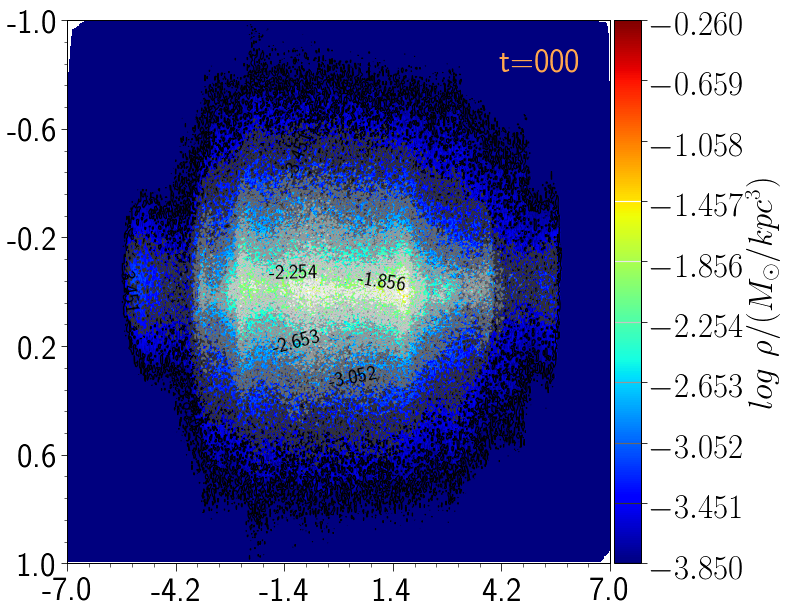

save


In [6]:
sindex=["000","005", "010","050","100","110","120","130","140","150","160","170","180","190","200","250","300","350"]

#paths     =path_save+'IMSHOW_EINT/phi_integrated/'
#paths     =path_save+'IMSHOW_VRMS/z_ABS3/phi_integrated/'

for sn in range(len(sindex)):
    if sn!=0:
        continue
    snap = 'snapshot_'+sindex[sn]
    print snap
    #ids, x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint = sb.reading_snap(path_snap,snap,0)
    #ids_s,x_s,y_s,z_s,mass_s,rho_s,vx_s,vy_s,vz_s,bx_s,by_s,bz_s,vrms_s,hsml_s,eint_s = \
    #sb.sorting_by_ids(ids,x,y,z,mass,rho,vx,vy,vz,bx,by,bz,vrms,hsml,eint)
   

    typep='rho'
    
    limx= [0,7]
    limy= [-1,1]
    limz= [-1,1]
    limrho=[-3.85,-0.26]
    liminte=[-2.15,1]
    limvrms=[-3,0]
    
    
    r=(x_s*x_s+y_s*y_s)**0.5
    limr   =[0,9] 

    if typep=='rho':
        prop  = np.log10(rho_s)
        limpr = limrho
        paths = path_save+'IMSHOW_RHO/niveles/'
        textbar = r"$log$ $\rho/(M_{\odot}/kpc^{3})$"
    elif typep=='u':
        prop  = np.log10(eint_s)
        limpr = liminte
        paths = path_save+'IMSHOW_EINT/niveles/'
        textbar = r"$log$  $U/(km/s)^{2}$"
    elif typep=='vrms':
        prop  = np.log10(vrms_s)
        limpr = limvrms        
        paths = path_save+'IMSHOW_VRMS/niveles/'
        textbar = r"$log$ $VRMS/(km/s)$"
    elif typep=='b':
        prop  = bz_s
        limpr = [bz_s.min(),bz_s.max()]        
        paths =path_save+'IMSHOW_BZ/niveles/'
        textbar = "Bz"

    
    im.plots_IMSHOW_cc(snap,x_s,z_s,r,prop,limx,limz,limr,limpr,500,10,textbar,paths,'typep')
    
    print 'save'

In [19]:
fig = plt.figure(figsize=(14,7))

#plot 1--------------------------------------------------------------------------------------------------------------------------------
ax1 = fig.add_subplot(121)
ax1.scatter(x_s[(rho>rho2) & (r<9) & (z_s>-1) & (z_s<50)],y_s[(rho>rho2) & (r<9) & (z_s>-1) & (z_s<50)],s=0.01,marker='.')
ax2 = fig.add_subplot(122)
ax2.scatter(x_s[(rho>rho2) & (r<9) & (z_s>-1) & (z_s<50)],z_s[(rho>rho2) & (r<9) & (z_s>-1) & (z_s<50)],s=0.01,marker='.')

plt.show()